# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

import numpy as np
import pandas as pd

# Load and convert data

In [ ]:
!wget http://deron.meranda.us/data/census-derived-all-first.txt

In [16]:
n_samples = 2500
data = pd.read_csv("census-derived-all-first.txt", delimiter="\s+", header=None)
data = np.array(data[0].values.ravel()[:n_samples], dtype=np.str)

In [17]:
from sklearn.feature_extraction.text import HashingVectorizer
X = HashingVectorizer(ngram_range=(2, 6), 
                      n_features=2**12, 
                      analyzer="char", 
                      non_negative=True, 
                      binary=True,
                      norm="l1").transform(data).toarray()

# Clustering

In [8]:
from beard.clustering import ScipyHierarchicalClustering
clustering = ScipyHierarchicalClustering(method="average", 
                                         affinity="cityblock",
                                         best_threshold_precedence=False).fit(X)

/home/gilles/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


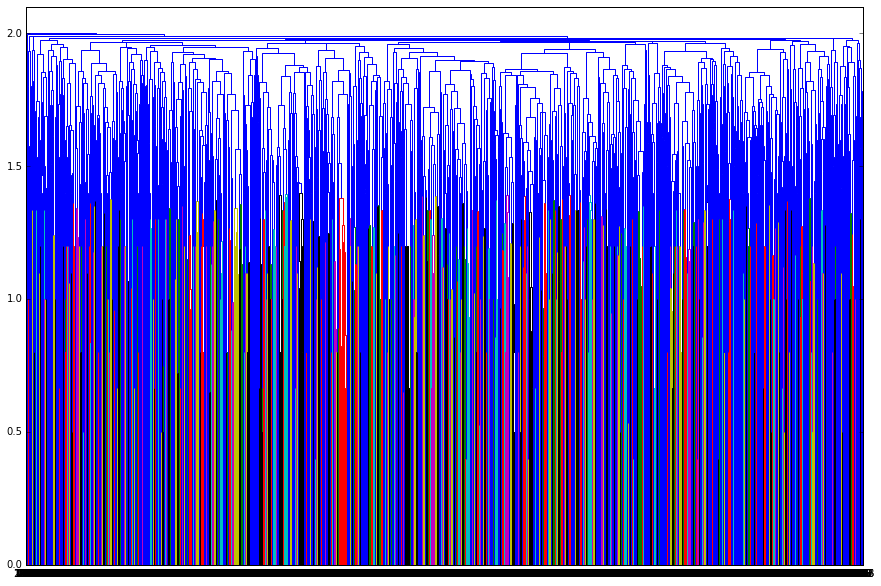

In [9]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 10))
Z = dendrogram(clustering.linkage_)
plt.show()

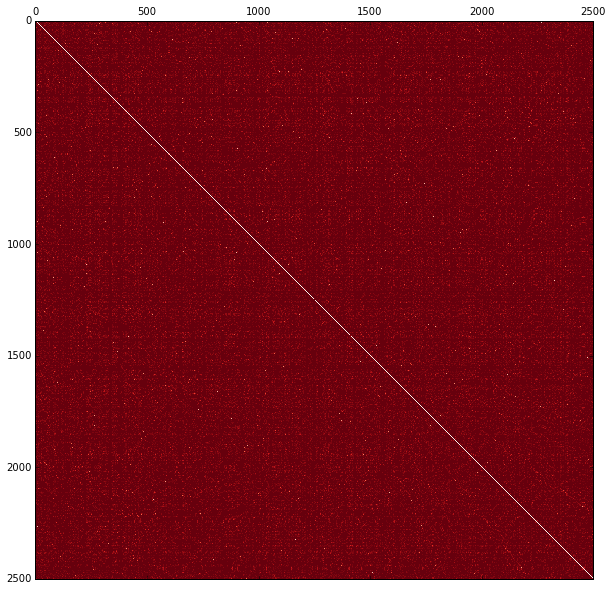

In [10]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster.bicluster import SpectralCoclustering

# Normal
X_aff = pairwise_distances(X, metric="cityblock")
plt.matshow(X_aff, cmap=plt.cm.Reds)

# # Biclustered
# model = SpectralCoclustering(n_clusters=8)
# model.fit(X_aff)

# X_aff = X_aff[np.argsort(model.row_labels_)]
# X_aff = X_aff[:, np.argsort(model.column_labels_)]

# plt.matshow(X_aff, cmap=plt.cm.Reds)

# Cut and visualize clusters

In [11]:
from sklearn.manifold import TSNE

model = TSNE(metric="cityblock")
coords = model.fit_transform(X)

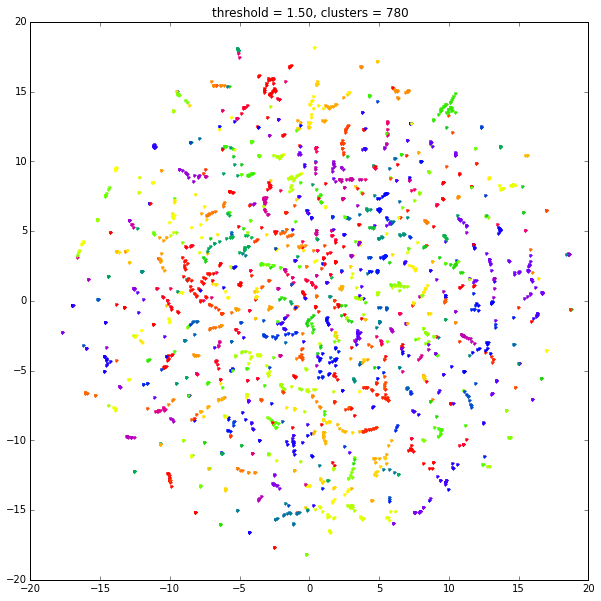

0 ['SUNG' 'SUN' 'UNA']
1 ['JUNE' 'JUNG']
2 ['YOUNG' 'HUNG' 'CHUNG']
3 ['JUNIOR']
4 ['HUGH' 'HUGO']
5 ['HUEY']
6 ['THUY']
7 ['CHUCK']
8 ['KIM' 'JIM' 'TIM' 'IMA']
9 ['MIKE' 'MIKEL']
10 ['NIKKI' 'VIKKI' 'NIKITA' 'NIKI']
11 ['KIP']
12 ['KYLE' 'LYLE' 'KYLA']
13 ['TYLER' 'DOYLE' 'MYLES']
14 ['KYLIE']


In [15]:
from ipywidgets import interact
from ipywidgets import FloatSlider

@interact(threshold=FloatSlider(min=0.0, max=clustering.linkage_[-1, 2], value=1.5, step=0.01))
def plot_clusters(threshold=1.5):
    clustering.set_params(threshold=threshold)
    clustering.set_params(n_clusters=None)
    labels = clustering.labels_
    n_labels = len(np.unique(labels))

    cm = plt.get_cmap("prism")
    colors =  (cm(1. * i / n_labels) for i in range(n_labels))
    
    plt.figure()
    plt.title("threshold = %.2f, clusters = %d" % (threshold, n_labels))

    for k, c in zip(np.unique(labels), colors):
        plt.plot(coords[labels == k, 0], coords[labels == k, 1], '.', label=k, color=c)

    plt.show()
    
    for i in range(min(n_labels, 15)):
        print(i, data[labels == i])